In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")

In [3]:
df.head()
m,n=data.shape

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(df)
m,c = data.shape
data = data.T
X_train = data[1:c]/255
Y_train = data[0]

In [7]:
print(X_train[:,0].shape[0])

784


In [6]:
np.unique(df.label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
def initialize_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    res = np.exp(Z)/sum(np.exp(Z))
    return res
                         
def forward_propagation(W1,b1,W2,b2,X):
    Z1 = W1.dot(X)+b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2


def ReLU_derivative(Z):
    return Z>0
    
def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def backward_propagation(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y = one_hot_encoding(Y)
    dZ2= A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1/m *dZ1.dot(X.T) 
    db1 = 1/m * np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

def gradient_descent(X,Y,epochs,learning_rate):
    W1,b1,W2,b2 = initialize_parameters()
    for i in range(epochs):
        # print("A",b1)
        Z1,A1,Z2,A2 = forward_propagation(W1,b1,W2,b2,X)
        # print("B",b1)
        dW1,db1,dW2,db2 = backward_propagation(Z1,A1,Z2,A2,W1,W2,X,Y)
        # print("C",db1)
        W1,b1,W2,b2 = update_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2,learning_rate)
        # print("D",b1)
        if(i%50==0):
            print("epoch: ",i,"\tAccuracy: ",accuracy(calc_predit(A2),Y))
    return W1,b1,W2,b2

def calc_predit(A2):
    return np.argmax(A2,0)

def accuracy(predictions,Y):
    return np.sum(predictions==Y)/Y.size
    
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,500,0.1)

epoch:  0 	Accuracy:  0.12823333333333334
epoch:  50 	Accuracy:  0.5662833333333334
epoch:  100 	Accuracy:  0.6294
epoch:  150 	Accuracy:  0.6681
epoch:  200 	Accuracy:  0.6742166666666667
epoch:  250 	Accuracy:  0.6964
epoch:  300 	Accuracy:  0.7144833333333334
epoch:  350 	Accuracy:  0.72995
epoch:  400 	Accuracy:  0.7425833333333334
epoch:  450 	Accuracy:  0.7513833333333333


In [9]:
def gradient_descent_cont(W1,b1,W2,b2,X,Y,epochs,learning_rate):
    for i in range(epochs):
        # print("A",b1)
        Z1,A1,Z2,A2 = forward_propagation(W1,b1,W2,b2,X)
        # print("B",b1)
        dW1,db1,dW2,db2 = backward_propagation(Z1,A1,Z2,A2,W1,W2,X,Y)
        # print("C",db1)
        W1,b1,W2,b2 = update_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2,learning_rate)
        # print("D",b1)
        if(i%50==0):
            print("epoch: ",i,"\tAccuracy: ",accuracy(calc_predit(A2),Y))
    return W1,b1,W2,b2

def calc_predit(A2):
    return np.argmax(A2,0)

def accuracy(predictions,Y):
    return np.sum(predictions==Y)/Y.size
    
W1,b1,W2,b2 = gradient_descent_cont(W1,b1,W2,b2,X_train,Y_train,500,0.1)

epoch:  0 	Accuracy:  0.7587
epoch:  50 	Accuracy:  0.7640166666666667
epoch:  100 	Accuracy:  0.7683666666666666
epoch:  150 	Accuracy:  0.7726166666666666
epoch:  200 	Accuracy:  0.7762
epoch:  250 	Accuracy:  0.7790666666666667
epoch:  300 	Accuracy:  0.7824833333333333
epoch:  350 	Accuracy:  0.7850666666666667
epoch:  400 	Accuracy:  0.7877
epoch:  450 	Accuracy:  0.7900666666666667


In [10]:
df_test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")
data = np.array(df_test)
m,c = data.shape
data = data.T
X_test = data[1:c]/255
Y_test = data[0]

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = calc_predit(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


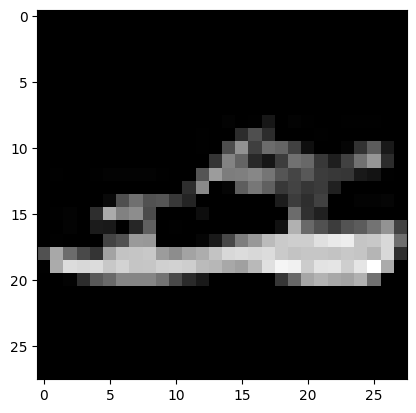

In [17]:
test_prediction(110,W1,b1,W2,b2,)